In [2]:
import mglearn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer, make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Normalizer, QuantileTransformer, PowerTransformer

#### 주성분 분석(PCA)
- 특성들이 통계적으로 상관관계가 없도록 데이터셋을 회전시키는 기술
- 회전한 뒤에 데이터를 설명하는데 얼마나 중요하냐에 따라 종종 일부만 선택

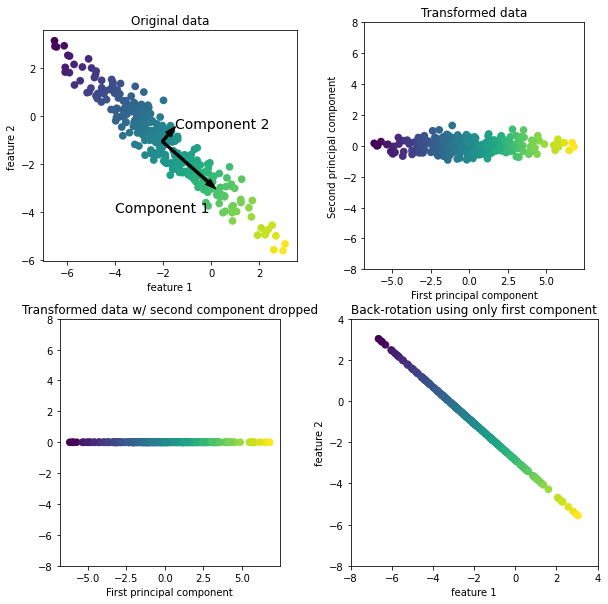

In [3]:
mglearn.plots.plot_pca_illustration()

- 첫 번째 그래프는 원본 데이터를 색으로 구분해 표시한 것
- 이 알고리즘은 Component1 이라고 쓰여 있는 분산이 가장 큰 방향을 찾는다. 이 방향이 데이터에서 가장 많은 정보를 담고 있는 방향 (다른 말로 상관관계가 가장 큰 방향)
- 그 다음, 첫 번째 방향과 직각인 방향 중 가장 많은 정보를 담은 방향을 찾는다.
- 이렇게 찾은 방향들을 데이터에 있는 주된 분산의 방향이라고 해서 주성분이라고 한다. 일반적으로 특성 개수만큼 주성분이 있다.
  #
- 두 번째 그래프는 주성분 1과 2를 각각 x축과 y축에 나란하도록 회전한 것.
- 회전하기 전에 평균을 빼서 중심을 원점에 맞춘다.
- PCA에 의해 회전된 두 축은 연관되어 있지 않으므로 변환된 데이터의 상관관계 행렬이 대각선 방향을 제외하고 0이 된다.
  #
- 세 번째 그래프처럼 주성분의 일부만 남기는 차원 축소 용도로 사용가능하다.
- 위의 그래프처럼 첫 번째 주성분만 유지할 경우 2차원 데이터가 1차원으로 차원이 감소한다.
- 단순히 원본 특성 중 하나만 남기는 것이 아니라 가장 유용한 방향을 찾아 그 방향의 성분을 유지하는 것
  #
- 마지막 그래프는 데이터에 평균을 더하고 반대로 회전시킨 것
- 원래 특성 공간에 놓여 있지만 첫 번째 주성분의 정보만 담고 있다.
- 데이터에서 노이즈를 제거하거나 주성분에서 유지되는 정보를 시각화하는데 종종 사용한다.

C:\Users\dbswo\AppData\Local\Temp\ipykernel_19732\3771193154.py:19: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing from current font.
  fig.tight_layout()
C:\Users\dbswo\AppData\Local\Temp\ipykernel_19732\3771193154.py:19: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.tight_layout()
C:\Users\dbswo\AppData\Local\Temp\ipykernel_19732\3771193154.py:19: UserWarning: Glyph 53356 (\N{HANGUL SYLLABLE KEU}) missing from current font.
  fig.tight_layout()
C:\Users\dbswo\AppData\Local\Temp\ipykernel_19732\3771193154.py:19: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  fig.tight_layout()
C:\Users\dbswo\AppData\Local\Temp\ipykernel_19732\3771193154.py:19: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from current font.
  fig.tight_layout()
C:\Users\dbswo\AppData\Local\Temp\ipykernel_19732\3771193154.py:19: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.tight_layout

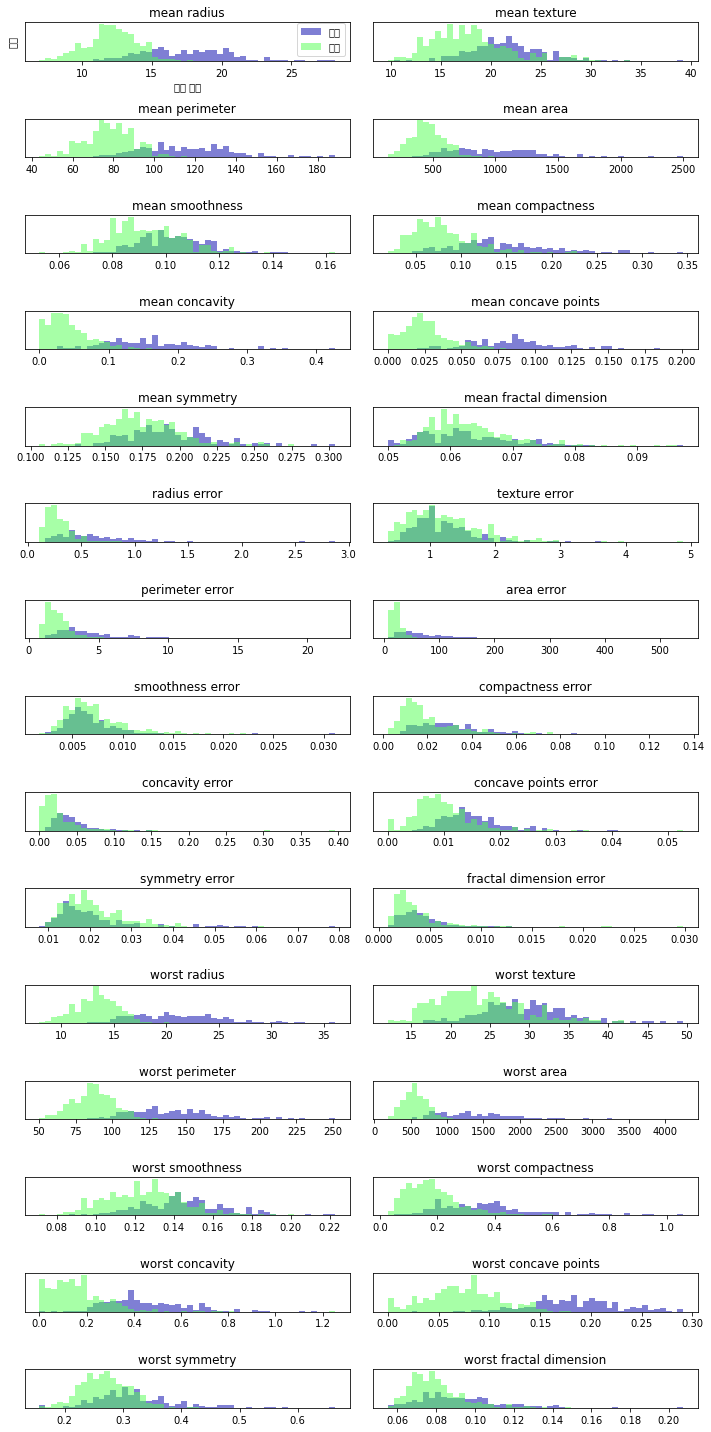

In [4]:
cancer = load_breast_cancer()

fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())

ax[0].set_xlabel('특성 크기')
ax[0].set_ylabel('빈도')
ax[0].legend(['악성', '양성'], loc='best')
fig.tight_layout()